# Data Exploration Cityscapes

In [12]:
import os
from torchvision.datasets import Cityscapes
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.datasets import Cityscapes

In [ ]:
train_dataset = Cityscapes('./dataset', split='train', mode='fine',
                     target_type='semantic')
test_dataset = Cityscapes('./dataset', split='val', mode='fine',
                     target_type='semantic')

print(f'Train dataset size : {len(train_dataset)}')
print(f'Test dataset size : {len(test_dataset)}')


img, smnt = train_dataset[0] 

Train dataset size : 2975
Test dataset size : 500


: 

: 

In [ ]:
print(f"Image size {img.size}")
print(f"Mask size {smnt.size}")

Image size (2048, 1024)
Mask size (2048, 1024)


: 

: 

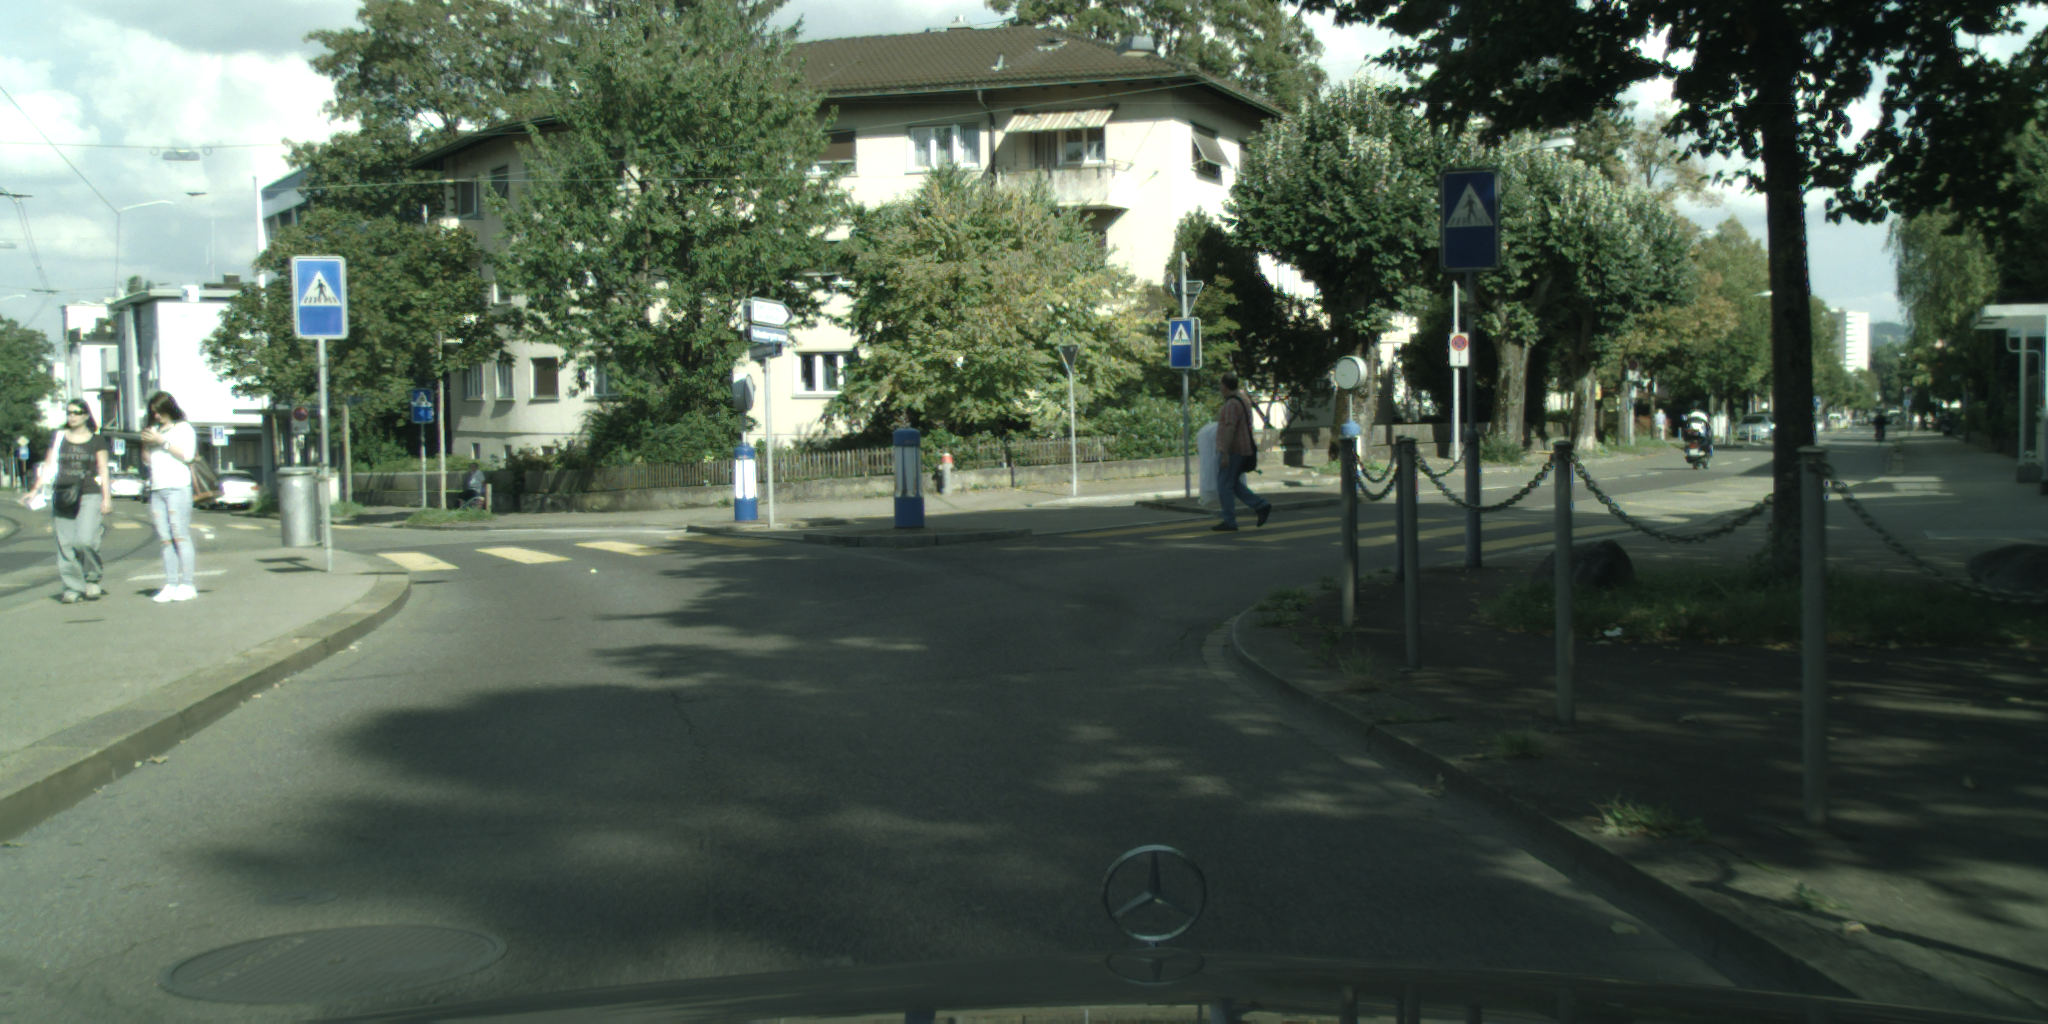

: 

: 

In [ ]:
img

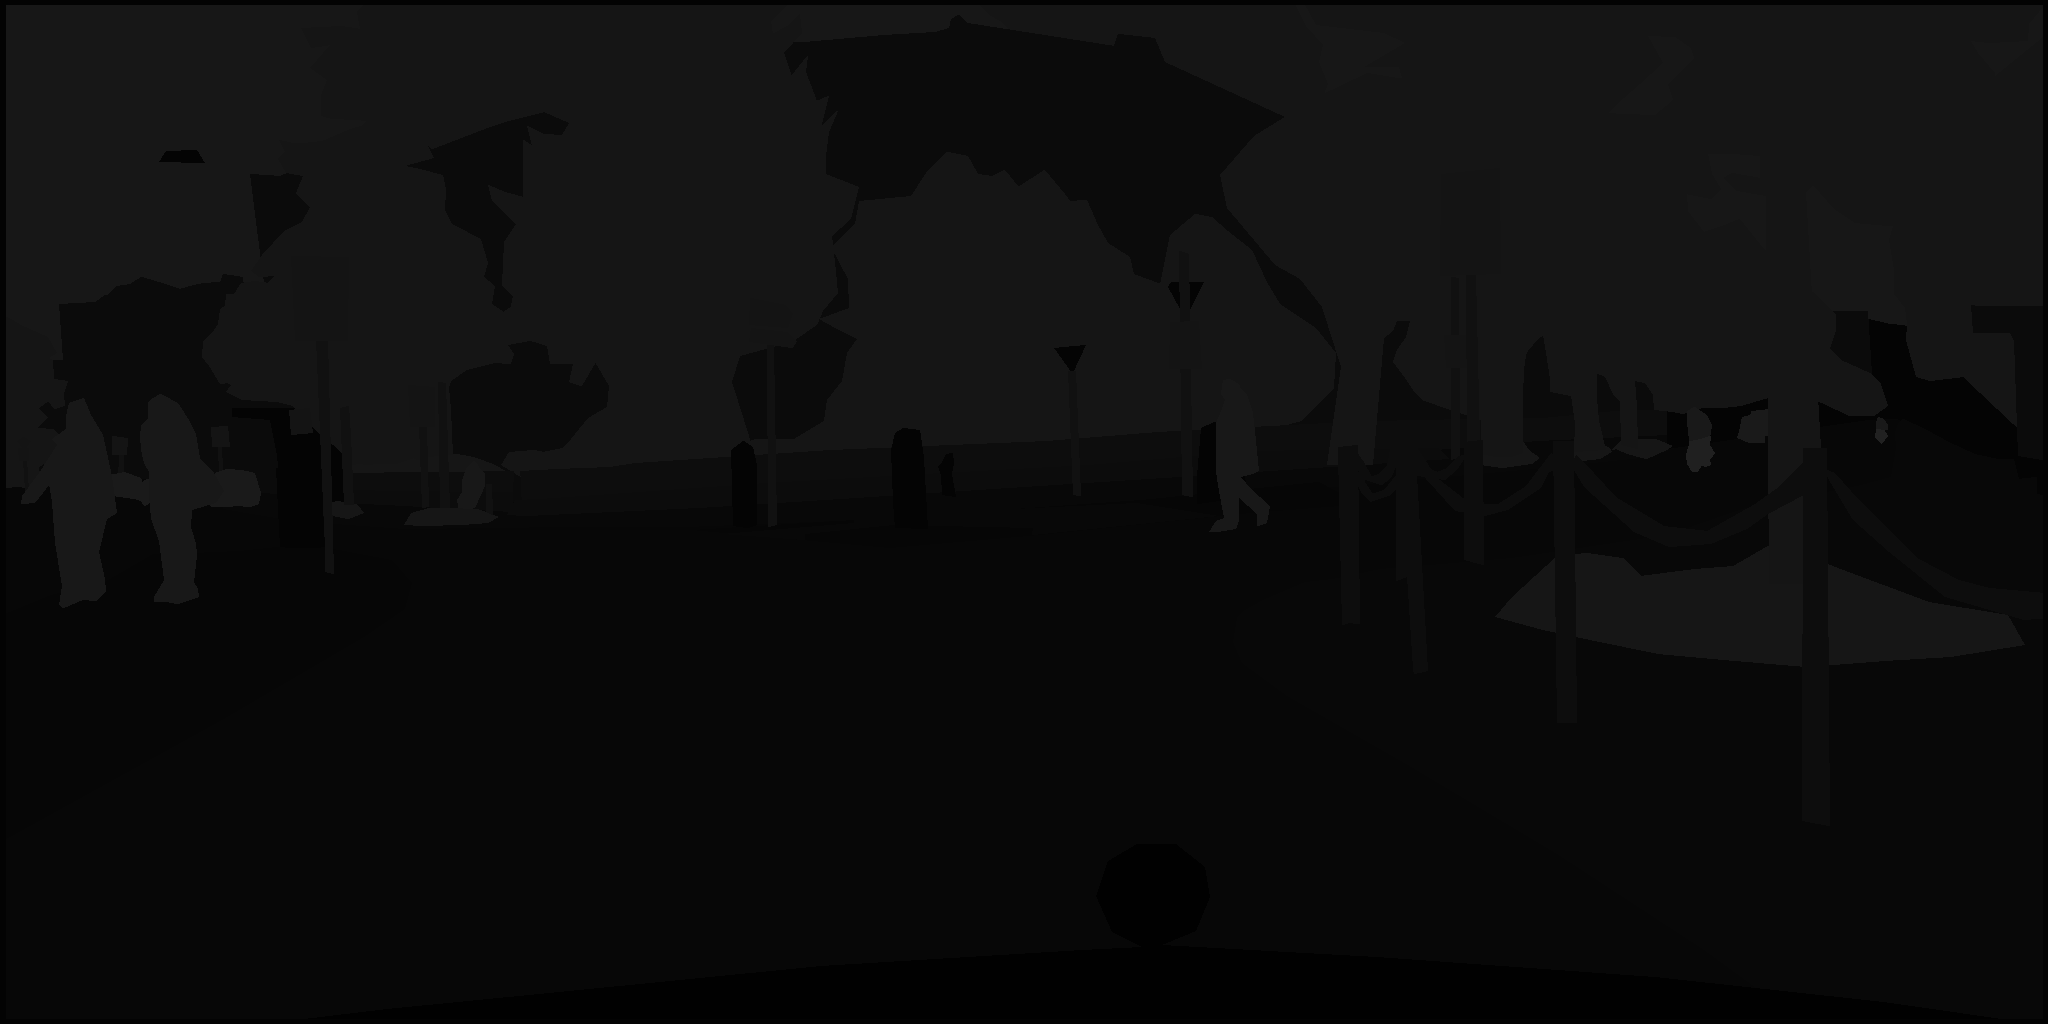

: 

: 

In [ ]:

smnt

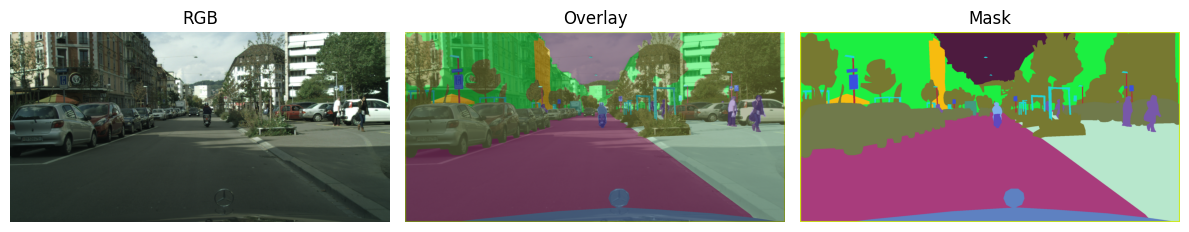

: 

: 

In [ ]:
import numpy as np

from torchvision.datasets import Cityscapes

def colorize_mask(mask_np: np.ndarray):
    """Assign a random color per label id (ignores 255)."""
    labels = np.unique(mask_np)
    labels = labels[labels != 255]  # 255 = ignore
    rng = np.random.default_rng(0)
    palette = {int(c): rng.integers(0, 255, 3, dtype=np.uint8) for c in labels}

    color = np.zeros((*mask_np.shape, 3), dtype=np.uint8)
    for c in labels:
        color[mask_np == c] = palette[c]
    return color

idx = 2
img_pil, mask_pil = train_dataset[idx]

img_np = np.asarray(img_pil, dtype=np.float32) / 255.0           # HxWx3 in [0,1]
mask_np = np.asarray(mask_pil, dtype=np.uint8)                   # HxW label ids
mask_col = colorize_mask(mask_np)                                # HxWx3 uint8
overlay = (0.5 * img_np + 0.5 * (mask_col.astype(np.float32)/255.0)).clip(0, 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_np);    plt.title("RGB");     plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(overlay);   plt.title("Overlay"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(mask_col);  plt.title("Mask");    plt.axis("off")
plt.tight_layout()
plt.savefig("data_exploration.png", dpi=150)
plt.show()


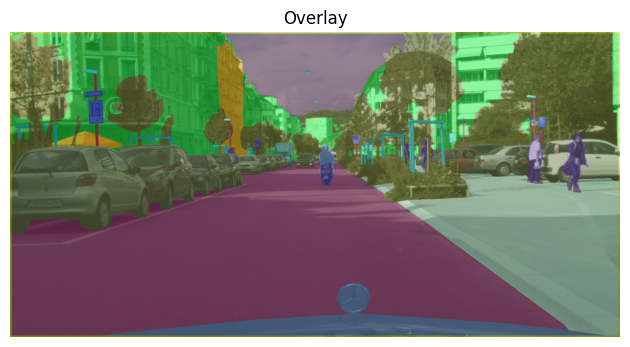

: 

: 

In [ ]:
plt.imshow(overlay);   plt.title("Overlay"); plt.axis("off")
plt.tight_layout()
plt.savefig("data_exploration.png", dpi=150)